<b>Загрузка датасета<b>

In [161]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/6 class csv.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


<b>Описание набора данных</b>

In [2]:
df.shape

(240, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
# уникальные значения
print(df.nunique())

Temperature (K)           228
Luminosity(L/Lo)          208
Radius(R/Ro)              216
Absolute magnitude(Mv)    228
Star type                   6
Star color                 19
Spectral Class              7
dtype: int64


In [6]:
for col in df.columns:
    print(df[col].value_counts(), "\n\n")

3600     3
3218     2
2650     2
3625     2
3324     2
        ..
10980    1
13720    1
19860    1
5300     1
37882    1
Name: Temperature (K), Length: 228, dtype: int64 


200000.00000    5
0.00067         3
0.00014         3
0.00098         3
0.00050         2
               ..
0.59000         1
0.15300         1
0.08500         1
0.35700         1
294903.00000    1
Name: Luminosity(L/Lo), Length: 208, dtype: int64 


36.0000      3
0.1100       3
1324.0000    3
0.2400       3
83.0000      2
            ..
0.0089       1
0.0109       1
0.0087       1
0.0131       1
1783.0000    1
Name: Radius(R/Ro), Length: 216, dtype: int64 


 12.23    3
 11.34    2
-10.70    2
-7.22     2
 14.23    2
         ..
 13.78    1
 12.45    1
 12.17    1
 12.13    1
-7.80     1
Name: Absolute magnitude(Mv), Length: 228, dtype: int64 


0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64 


Red                   112
Blue                   55
Blue-white             26
Blue White  

Проанализировав закруженный датафрейм, получили, что он содержит информацию о 240 объектах, каждый из которых имеет описание по 7 признакам, один из которых является меткой.<br>
Все признаки представлены в виде типов object, int, float<br>

Задачей является классифицирование звезды по ее типу.

<b>3.	Целевая и факторные переменные</b>

ЦЕЛЕВАЯ ПЕРЕМЕННАЯ

In [7]:
# целевая переменная - площадь

df['Star type'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='Star type', ylabel='count'>

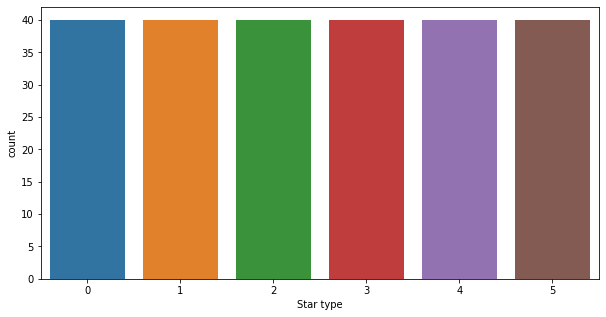

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x=df['Star type'])

In [9]:
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

Данные сбалансированны, каждый тип звезды представлен в количестве 40 штук

ФАКТОРНЫЕ ПЕРЕМЕННЫЕ

In [12]:
print('Категориальные признаки: ', df.select_dtypes(include='object').columns.tolist())
print('Количественные признаки: ', df.select_dtypes(exclude='object').columns.tolist())

Категориальные признаки:  ['Star color', 'Spectral Class']
Количественные признаки:  ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']


количественные признаки

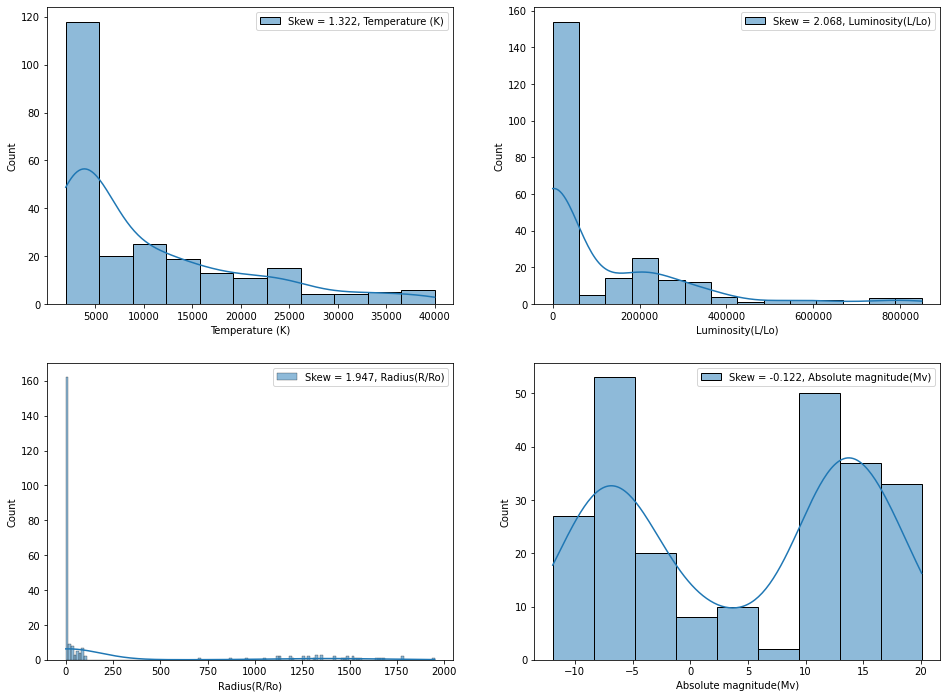

In [21]:
# распределение количественных признаков

cols = df.select_dtypes(exclude='object').columns.tolist()
cols.remove("Star type")

fig,ax = plt.subplots(2,2, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.histplot(x=df[col], ax = ax[i], kde=True, label=f'Skew = {round(skew, 3)}, {col}')
    ax[i].legend(loc='best')
    i += 1
plt.show()


категориальные признаки

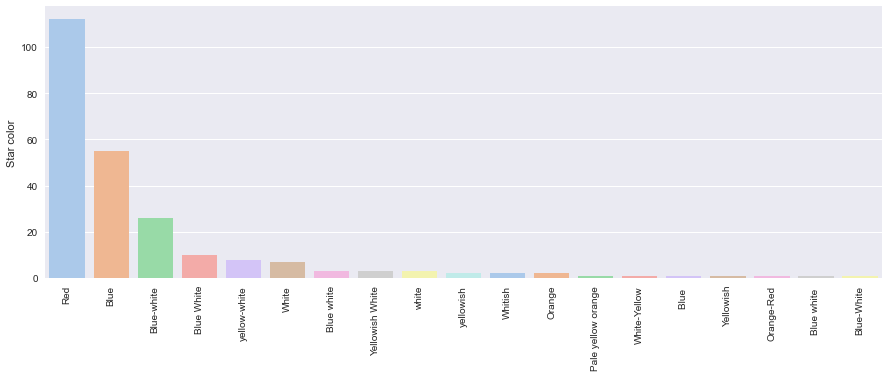

In [100]:
# распределение столбца 'Star color'

df2 = pd.read_csv("data/6 class csv.csv")

values = pd.DataFrame(df2['Star color'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(15,5))
ax = sns.barplot(x = values.index, y = 'Star color' , data = values, palette='pastel')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

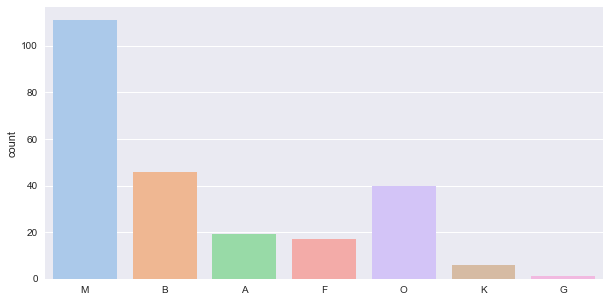

In [101]:
# распределение столбца 'Spectral Class'

plt.figure(figsize=(10,5))
sns.countplot(data=df2, x="Spectral Class", palette='pastel')
plt.xlabel(None)
plt.show()

Целевой признак 'Star type' представлен в виде 6 значений от 0 до 5<br>
Факторные признаки представлены в виде различных значений. Они описывают различные свойства звезд: температуру, светимость, радиус, магнитуда, цвет и спектральный класс<br>
Распределение признаков скошено вправо<br>


<b>Анализ отсутствующих значений</b>

ДУБЛИКАТЫ

In [19]:
df.duplicated().sum()

0

Дубликатов в датафрейме нет

ОТСУТСТВУЮЩИЕ ЗНАЧЕНИЯ

In [13]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

Пропущенных значений в датафрейме нет<br>

УДАЛЕНИЕ НЕНУЖНЫХ ДАННЫХ

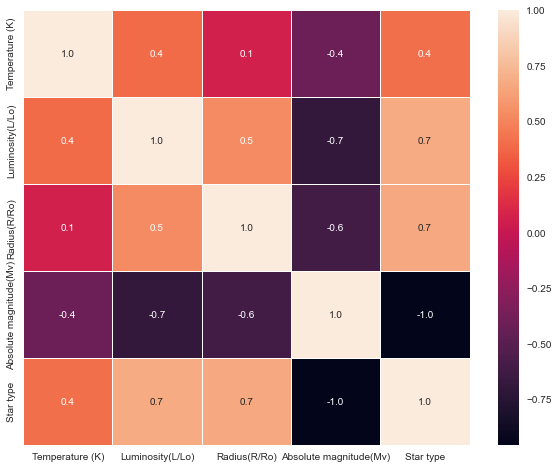

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
ax=sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f')
plt.show()

столбец 'Absolute magnitude(Mv)' имеет сильную корреляцию. Удалять не будем, т.к. мало признаков в датасете (возможно удаление + введение доп признаков)


<b>Количественные параметры датасета</b>

сильная корреляция - можно рассмотреть только один из двух признаков
чем меньше корреляция - значит можно этот признак убрать из изучения

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity(L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius(R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude(Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


Количество столбцов каждого признака совпадает с размером набора данных. Это подтверждает то, что пропущенных значений нет.

Часть признаков имеют более высокое среднее значение, чем медиана, т.е. распределения перекошены вправо.<br>
Особенно это видно по признаку Luminosity(L/Lo), Radius(R/Ro)<br>
Распределение признака Absolute magnitude(Mv) наоборот имеет скос влево.

In [147]:
# перекос - степень искажения нормального распределения
print("Перекосы: \n{}".format(df.select_dtypes(exclude='object').skew()))

print()

# хвосты распределения - описывает наличие выбросов
print("Эксцессы: \n{}".format(df.select_dtypes(exclude='object').kurtosis()))

Перекосы: 
Temperature (K)           1.321568
Luminosity(L/Lo)          2.068069
Radius(R/Ro)              1.946800
Absolute magnitude(Mv)   -0.121540
Star type                 0.000000
dtype: float64

Эксцессы: 
Temperature (K)           0.877352
Luminosity(L/Lo)          4.465098
Radius(R/Ro)              2.072935
Absolute magnitude(Mv)   -1.655888
Star type                -1.269979
dtype: float64


Колонки, которые имеют положительную асимметрию, значение больше +1, поэтому они перекошены вправо<br>
Колонки, которые имеют отрицательную асимметрию, значение меньше -1, поэтому они перекошены влево<br>

Колонки 'Luminosity(L/Lo)', 'Radius(R/Ro)' имеют высокое значение эксцесса, т.е. имеют выбросы<br>

Проверим перекосы для некоторых признаком с наибольшими значениями

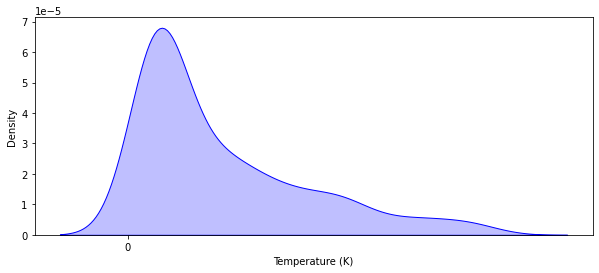

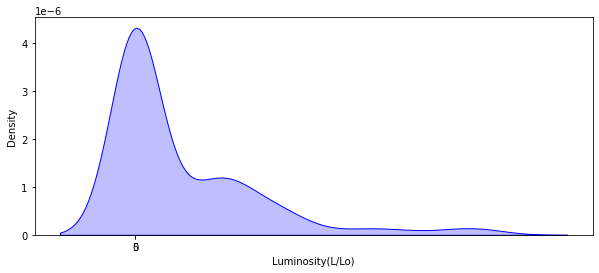

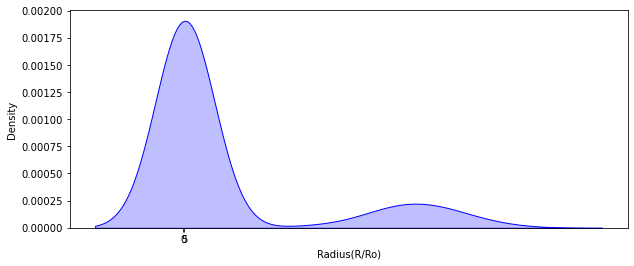

In [26]:
# распределение 

plt.figure(figsize=(10,4))
ax = sns.kdeplot(df['Temperature (K)'],shade=True,color='b')
plt.xticks([i for i in range(0,50,50)])
plt.show()

plt.figure(figsize=(10,4))
ax = sns.kdeplot(df['Luminosity(L/Lo)'],shade=True,color='b')
plt.xticks([i for i in range(0,10,5)])
plt.show()

plt.figure(figsize=(10,4))
ax = sns.kdeplot(df['Radius(R/Ro)'],shade=True,color='b')
plt.xticks([i for i in range(0,10,5)])
plt.show()


признаки скошены вправо - что соответствует ранее полученным результам

Теперь рассмотрим выбросы для признаков

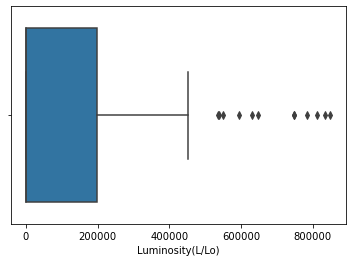

<AxesSubplot:xlabel='Radius(R/Ro)'>

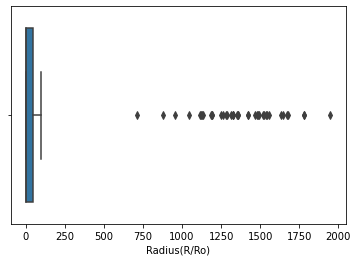

In [27]:
# выбросы

sns.boxplot(x=df['Luminosity(L/Lo)'])
plt.show()
sns.boxplot(x=df['Radius(R/Ro)'])



наличие выбросов подтверждено графиком. наибольшее кол-во выбросов у признака age

поработаем с выбросами - заменим значения на натуральный логарифм

In [162]:
# работа с выбросами - замена значений на натуральный логарифм

outlier_columns = ['Luminosity(L/Lo)', 'Radius(R/Ro)']
np.log1p(df[outlier_columns]).skew()

Luminosity(L/Lo)    0.364929
Radius(R/Ro)        1.003220
dtype: float64

In [163]:
np.log1p(df[outlier_columns]).kurtosis()

Luminosity(L/Lo)   -1.783091
Radius(R/Ro)       -0.488341
dtype: float64

Выполненное преобразование уменьшило показатели перекоса и выбросов - преобразуем данные

In [164]:
# замена колонок с выбросами на ln

df[outlier_columns] = np.log1p(df[outlier_columns])

<b>Разбиение выборки на обучающую и тестовую</b>

Кодировка категориальных данных на числовые значение

In [165]:
# замена столбца Star color и Spectral Class на числовые значения

from sklearn import preprocessing

df['Star color'] = preprocessing.LabelEncoder().fit_transform(df['Star color'])
df['Spectral Class'] = preprocessing.LabelEncoder().fit_transform(df['Spectral Class'])

df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002397,0.157004,16.12,0,10,5
1,3042,0.000500,0.143407,16.60,0,10,5
2,2600,0.000300,0.097127,18.70,0,10,5
3,2800,0.000200,0.148420,16.65,0,10,5
4,1939,0.000138,0.098034,20.06,0,10,5


In [166]:
# разделение на признаки и метки

X = df.drop(columns=['Star type'], axis=1)
y = df['Star type']

print(f'Признаки: {X.shape}')
print(f'Метки: {y.shape}')

Признаки: (240, 6)
Метки: (240,)


In [167]:
# разбиение на выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4)#Вот это надо делать перед преобразованием данных! -0.5

print(f'Размер:')
print(f' обучающей выборки {X_train.shape} - признаки; {y_train.shape} - метки')
print(f' тестовой выборки  {X_test.shape} - признаки; {y_test.shape} - метки')

Размер:
 обучающей выборки (192, 6) - признаки; (192,) - метки
 тестовой выборки  (48, 6) - признаки; (48,) - метки


<b>Вариант 5. Исследование влияния обучения без учителя на эффективность обучения</b>

ПОДГОТОВКА ДАННЫХ

In [168]:
# стандартизация признаков

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

ОБУЧЕНИЕ С УЧИТЕЛЕМ

In [169]:
# датафрейм для вывода итоговых результатов

models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

In [170]:
# функции для расчета показателей

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

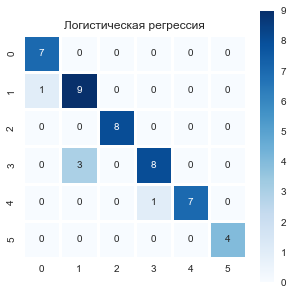

Точность модели: 0.8958 %


In [171]:
# ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model_LR= LogisticRegression(random_state=1, max_iter=10000)
model_LR.fit(X_train,y_train)

y_pred_lr = model_LR.predict(X_test)

# матрица точности классификации
plt.figure(figsize=(5,5))

f1_score_rfc = f1_score(y_test,y_pred_lr, average='micro')
cm_rfc = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm_rfc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues')
plt.title('Логистическая регрессия')
plt.show()
print('Точность модели: {0:0.4f} %'.format(accuracy_score(y_test, y_pred_lr)))

acc_lr = accuracy_score(y_test, y_pred_lr)



mae, mse, r2 = evaluate(y_test, y_pred_lr)
rmse = rmse_cv(model_LR)
new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

Text(0.5, 1.0, 'Кривая обучения для Логистической регрессии')

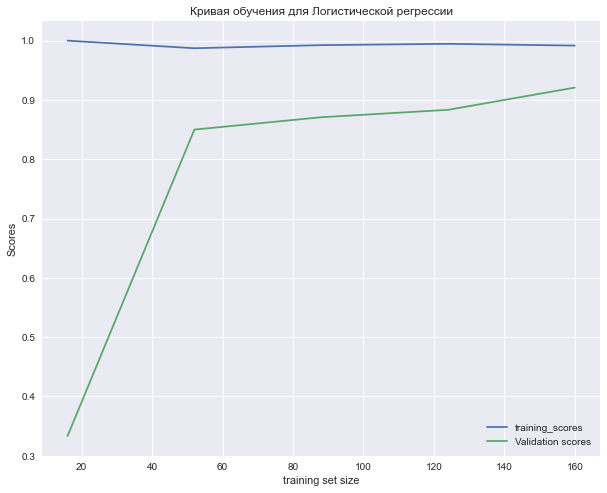

In [172]:
# КРИВАЯ ОБУЧЕНИЯ

from sklearn.model_selection import learning_curve
import math

train_sizes=[math.floor(len(X)/4),math.floor(len(X)/3),math.floor(len(X)/2),len(X)]

train_sizes,train_scores,valid_scores=learning_curve(estimator=model_LR, X=X, y=y, cv=3)

mean_training_scores=train_scores.mean(axis=1)
mean_valid_scores=valid_scores.mean(axis=1)
plt.style.use('seaborn')
plt.figure(figsize=(10,8))
plt.plot(train_sizes,mean_training_scores,label='training_scores')
plt.plot(train_sizes,mean_valid_scores,label='Validation scores')
plt.xlabel('training set size')
plt.ylabel('Scores')
plt.legend()

plt.title('Кривая обучения для Логистической регрессии')

Тестовая точность близка к обучающей - модель недообучается

ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

ПОНИЖЕНИЕ РАЗМЕРНОСТИ

In [173]:
# МЕТОД PCA

%matplotlib inline
from sklearn.decomposition import PCA

# нормализация признаков
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features

# объясненные коэффициенты дисперсии из PCA по всем признакам
pca = PCA()
pca.fit(scaled_features)

# процент отклонения, объясненный каждым из выбранных компонентов
exp_variance = pca.explained_variance_ratio_

Text(0.5, 0, 'Principal Component number')

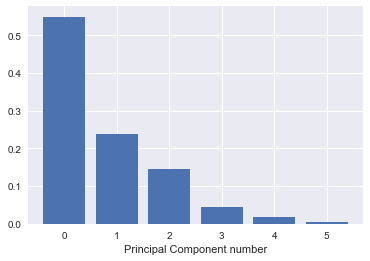

In [174]:
# гистограмма

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component number')

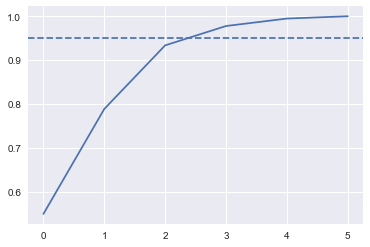

In [175]:
# расчет кумулятивной объясненной дисперсии
cum_exp_variance = np.cumsum(exp_variance)

# график кумулятивной объясненной дисперсии и пунктирная 
# линия на уровне 0,85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.95, linestyle='--')

Из графика видно, что примерно 2 признака могут объяснить 95% дисперсии. Поэтому можно использовать 2 компоненты для проведения PCA и уменьшения размерности выборки

In [176]:
# PCA с выбранным числом компонентов
pca = PCA(n_components = 2, random_state=10)

# подгонка и преобразование признаков
pca = pca.fit_transform(scaled_features)

pca.shape

(240, 2)

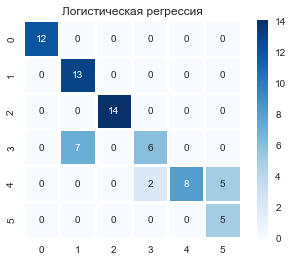

Точность модели: 0.8056 %


In [177]:
# повторное обучение модели

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca, y, test_size=0.3,random_state=4)#Зачем вы уменьшаете кол-во данных, это надо делать один раз в самом начале! -0.5

model_LR_pca= LogisticRegression(random_state=1, max_iter=10000)
model_LR_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = model_LR_pca.predict(X_test_pca)


# матрица точности классификации
f1_score_rfc_pca = f1_score(y_test_pca, y_pred_pca, average='micro')
cm_rfc_pca = confusion_matrix(y_test_pca, y_pred_pca)
sns.heatmap(cm_rfc_pca, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues')
plt.title('Логистическая регрессия')
plt.show()
print('Точность модели: {0:0.4f} %'.format(accuracy_score(y_test_pca, y_pred_pca)))


mae, mse, r2 = evaluate(y_test_pca, y_pred_pca)
rmse = rmse_cv(model_LR_pca)
new_row = {"Model": "LinearRegression PCA","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models.append(new_row, ignore_index=True)

Text(0.5, 1.0, 'Кривая обучения для Логистической регрессии')

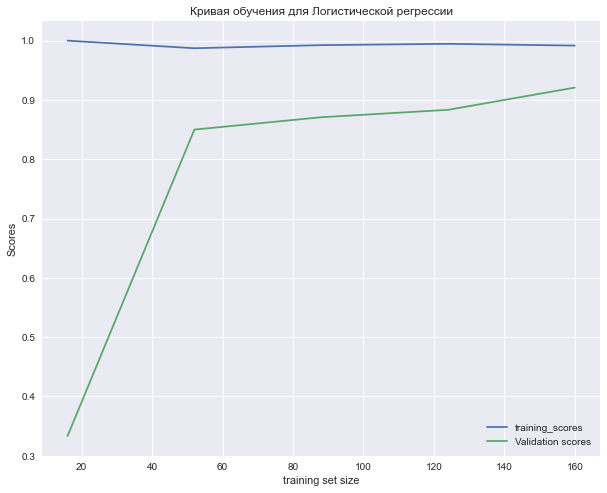

In [178]:
train_sizes=[math.floor(len(X)/4),math.floor(len(X)/3),math.floor(len(X)/2),len(X)]

train_sizes,train_scores,valid_scores=learning_curve(estimator=model_LR_pca, X=X, y=y, cv=3)

mean_training_scores=train_scores.mean(axis=1)
mean_valid_scores=valid_scores.mean(axis=1)
plt.style.use('seaborn')
plt.figure(figsize=(10,8))
plt.plot(train_sizes,mean_training_scores,label='training_scores')
plt.plot(train_sizes,mean_valid_scores,label='Validation scores')
plt.xlabel('training set size')
plt.ylabel('Scores')
plt.legend()

plt.title('Кривая обучения для Логистической регрессии')

В результате обучения модели на данных с пониженной размерностью получили уменьшение точности с 89 до 80%

In [179]:
models.sort_values(by="RMSE (Cross Validated)")

,Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
0,LinearRegression,0.166667,0.291667,0.875348,0.181496
1,LinearRegression PCA,0.291667,0.486111,0.797542,0.181496


In [180]:
from sklearn.metrics import classification_report

print('Логистическая регрессия\n')
print(classification_report(y_test, y_pred_lr))

Логистическая регрессия

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.75      0.90      0.82        10
           2       1.00      1.00      1.00         8
           3       0.89      0.73      0.80        11
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00         4

    accuracy                           0.90        48
   macro avg       0.92      0.92      0.91        48
weighted avg       0.90      0.90      0.90        48



In [181]:
print('Логистическая регрессия PCA\n')
print(classification_report(y_test_pca, y_pred_pca))

Логистическая регрессия PCA

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.65      1.00      0.79        13
           2       1.00      1.00      1.00        14
           3       0.75      0.46      0.57        13
           4       1.00      0.53      0.70        15
           5       0.50      1.00      0.67         5

    accuracy                           0.81        72
   macro avg       0.82      0.83      0.79        72
weighted avg       0.86      0.81      0.80        72



Получили, что точность изначальной модели более высокая, так же она имеет более высокий показатель r2 Score, показатель средне-квадратичной ошибки одинаков для обеих моделей

По отчету видим, что точность некоторых типов звезд (например 2) повысилась, а некоторых понизилась.

КЛАСТЕРИЗАЦИЯ

In [182]:
X_k = df.drop(columns=['Star type'], axis=1)
y_k = df['Star type']

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_k)

X_k = sc.transform(X_k)

In [183]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

wcss = []
K = range(2, 10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=1).fit(X_k)
    k_means.fit(X_k)
    wcss.append(k_means.inertia_)

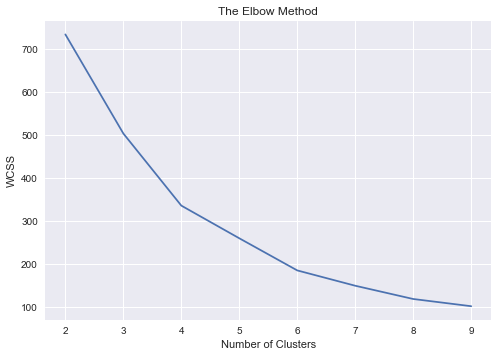

In [184]:
plt.plot(range(2, 10), wcss, scalex=True)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

С помощью метода локтя видим. что преломление на кол-ве 4 и 6 - попробуем использовать оба значения

In [188]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=1)

kmeans.fit(X_k)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y_k == labels)

print("Результат: %d из %d экземпляров были правильно определены." % (correct_labels, y_k.size))

print('Точность: {0:0.2f}'. format(correct_labels/float(y_k.size)))

Результат: 70 из 240 экземпляров были правильно определены.
Точность: 0.29


In [187]:
kmeans = KMeans(n_clusters=6,random_state=1)

kmeans.fit(X_k)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y_k == labels)

print("Результат: %d из %d экземпляров были правильно определены." % (correct_labels, y_k.size))

print('Точность: {0:0.2f}'. format(correct_labels/float(y_k.size)))

Результат: 81 из 240 экземпляров были правильно определены.
Точность: 0.34


В результате получили, что точность модели с 6 кластерами обучилась более точно, определив 81 правильный экземпляр, в отличие от модели с 4 кластерами

В итоге получена модель, обученная при помощи Логистической регрессии, которая имеет точность в 89%. Эта точность не плохая, но лучше улучшить ее. Можно использовать gridsearch. Либо, т.к. тестовая точность по кривой обучения близка к обучающей, то можно использовать более сложную модель или снижение регуляризации. <br>
Использованное обучение без учителя не смогло улучшить изначальную модель